In [1]:
import sys
sys.path.append('../')
import potential as potlib
from gala.units import UnitSystem
from astropy import units as u
usys = UnitSystem(u.kpc, u.Myr, u.Msun, u.radian)
import jax.numpy as jnp

import diffrax
import fields as fields

import StreamSculptor
import potential
import matplotlib.pyplot as plt
import numpy as np
import jax
jax.config.update("jax_enable_x64", True)


In [2]:
pot_NFW = potential.NFWPotential(m=1e12,r_s=20.0,units=usys)

In [3]:
ts = jnp.linspace(0,3000,100)#1500)
w0=jnp.array([20.,0.,20.,.0,.2,.0])
sol = pot_NFW.integrate_orbit(w0=w0, ts=ts,dense=True )



In [4]:
hamiltonian_field = fields.hamiltonian_field(pot_NFW)
hamiltonian_field.term(0.0,jnp.array([1.,2.,3.,.2,.3,.4]), None)

Array([ 0.2       ,  0.3       ,  0.4       , -0.0011937 , -0.00238739,
       -0.00358109], dtype=float64)

In [5]:
kwargs = {'rtol':1e-6,'atol':1e-6,}


In [6]:
field_orb = fields.integrate_field(w0=w0, ts=ts,field=hamiltonian_field, backwards_int=False)
sol = pot_NFW.integrate_orbit(w0=w0, ts=ts,dense=False , **kwargs)


sol2 = pot_NFW.integrate_orbit(w0=w0+.01, ts=ts,dense=False , **kwargs)


In [7]:
field_orb.ys

Array([[ 2.00000000e+01,  0.00000000e+00,  2.00000000e+01,
         0.00000000e+00,  2.00000000e-01,  0.00000000e+00],
       [ 1.94621422e+01,  6.00612524e+00,  1.94621422e+01,
        -3.53817653e-02,  1.94608208e-01, -3.53817653e-02],
       [ 1.78699762e+01,  1.16860673e+01,  1.78699762e+01,
        -6.93417615e-02,  1.78493103e-01, -6.93417615e-02],
       [ 1.52893063e+01,  1.67178210e+01,  1.52893063e+01,
        -1.00355808e-01,  1.51888440e-01, -1.00355808e-01],
       [ 1.18346660e+01,  2.07910113e+01,  1.18346660e+01,
        -1.26724355e-01,  1.15362171e-01, -1.26724355e-01],
       [ 7.67488481e+00,  2.36207150e+01,  7.67488481e+00,
        -1.46572431e-01,  7.00797623e-02, -1.46572431e-01],
       [ 3.03678320e+00,  2.49704582e+01,  3.03678320e+00,
        -1.57985136e-01,  1.81240031e-02, -1.57985136e-01],
       [-1.79804719e+00,  2.46840765e+01, -1.79804719e+00,
        -1.59333328e-01, -3.72645619e-02, -1.59333328e-01],
       [-6.50906462e+00,  2.27208626e+01, -6.509

In [8]:
sol.ys.sum()

Array(-66.03366693, dtype=float64)

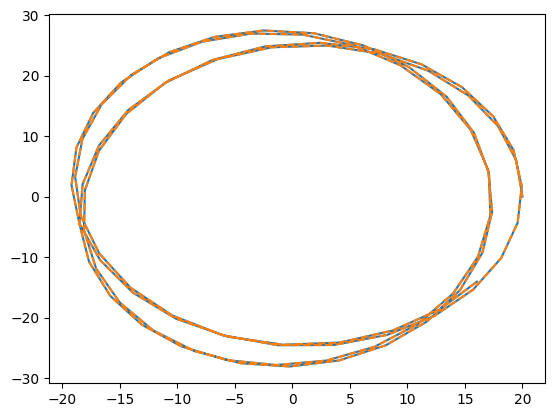

In [9]:
plt.plot(field_orb.ys[:,0], field_orb.ys[:,1])
plt.plot(sol.ys[:,0], sol.ys[:,1],ls='--')

In [10]:
kwargs = {'rtol':1e-8}


ts.shape

(100,)

In [11]:
l, t = pot_NFW.gen_stream_scan(prog_w0=w0,ts=ts,Msat=1e4,seed_num=493,kval_arr=1.0) 

In [12]:
#lv, tv = pot_NFW.gen_stream_vmapped(prog_w0=w0,ts=ts,Msat=1e4,seed_num=493, **kwargs)

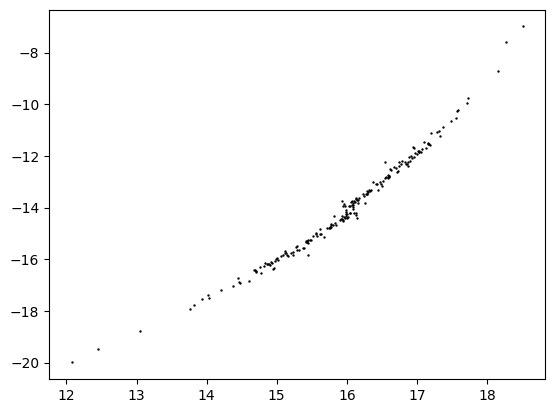

In [13]:
plt.scatter(l[:,0], l[:,1],s=0.5,color='k')
plt.scatter(t[:,0], t[:,1],s=0.5,color='k')

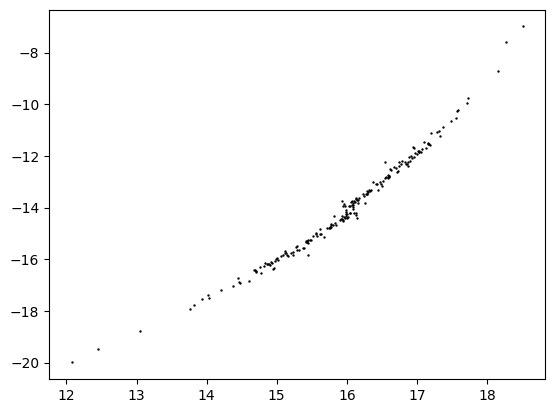

In [14]:
plt.scatter(l[:,0], l[:,1],s=0.5,color='k')
plt.scatter(t[:,0], t[:,1],s=0.5,color='k')

#plt.plot(sol.ys[:,0], sol.ys[:,1],ls='--')

#plt.scatter(lv[:,0], lv[:,1],s=0.5,color='r')
#plt.scatter(tv[:,0], tv[:,1],s=0.5,color='r')

In [15]:
kwargs = {'rtol':1e-5, 'atol':1e-5}

In [16]:
diffrax.Tsit5(scan_kind="bounded")

Tsit5(scan_kind='bounded')

In [17]:
ld_td = pot_NFW.gen_stream_scan_dense(prog_w0=w0,ts=ts,Msat=1e4,seed_num=493, solver=diffrax.Bosh3())

In [18]:
ld_td

Solution(
  t0=f64[99,2],
  t1=f64[99,2],
  ts=None,
  ys=None,
  interpolation=DenseInterpolation(
    ts=f64[99,2,10001],
    ts_size=weak_i64[99,2],
    infos={
      'k':
      f64[99,2,10000,4,6],
      'y0':
      f64[99,2,10000,6],
      'y1':
      f64[99,2,10000,6]
    },
    interpolation_cls=<bound method ThirdOrderHermitePolynomialInterpolation.from_k of <class 'diffrax._local_interpolation.ThirdOrderHermitePolynomialInterpolation'>>,
    direction=weak_i64[99,2],
    t0_if_trivial=f64[99,2],
    y0_if_trivial=f64[99,2,6]
  ),
  stats={
    'max_steps':
    weak_i64[99,2],
    'num_accepted_steps':
    weak_i64[99,2],
    'num_rejected_steps':
    weak_i64[99,2],
    'num_steps':
    weak_i64[99,2]
  },
  result=EnumerationItem(
    _value=i32[99,2],
    _enumeration=<class 'diffrax._solution.RESULTS'>
  ),
  solver_state=None,
  controller_state=None,
  made_jump=None,
  event_mask=None
)

In [19]:
import equinox as eqx
ind = 28
arr, narr = eqx.partition(ld_td, eqx.is_array)
arr = jax.tree_util.tree_map(lambda x: x[ind,0], arr)
interp = eqx.combine(arr, narr)

eval_func_lead = interp.evaluate
eval_func_lead(3000.0)

Array([ 17.02632671, -11.82134479,  17.06534491,   0.07833218,
         0.17862601,   0.0784892 ], dtype=float64)

In [20]:
ld, td = StreamSculptor.eval_dense_stream(2200.0, ld_td)

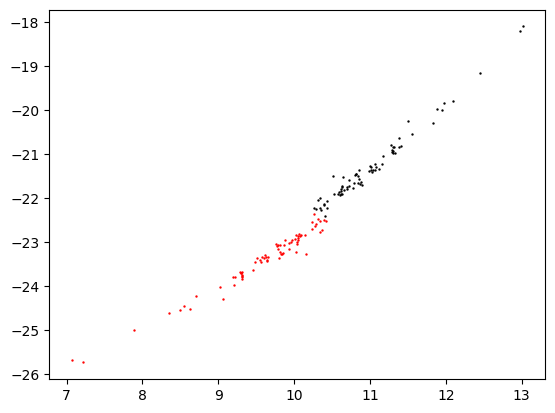

In [21]:
plt.scatter(ld[:,0], ld[:,1],s=0.5,color='k')
plt.scatter(td[:,0], td[:,1],s=0.5,color='r')


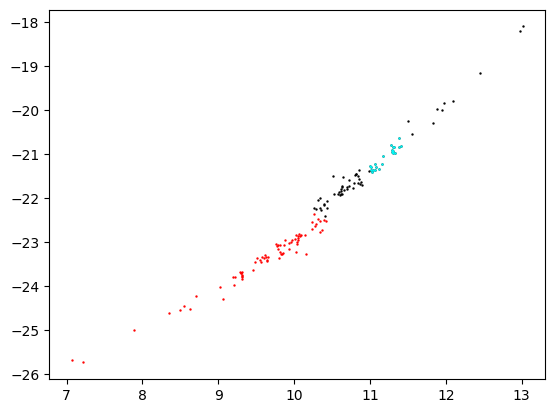

In [22]:
in_bool = (ld[:,0]>11) & (ld[:,0]<11.5)
plt.scatter(ld[:,0], ld[:,1],s=0.5,color='k')
plt.scatter(td[:,0], td[:,1],s=0.5,color='r')

plt.scatter(ld[in_bool,0], ld[in_bool,1],s=0.5,color='cyan')

x0v0_SH = jnp.mean(ld[in_bool,:],axis=0)

In [23]:
x0v0_SH.shape

(6,)

In [24]:
#ldv_tdv = pot_NFW.gen_stream_vmapped_dense(prog_w0=w0,ts=ts,Msat=1e4,seed_num=493,solver=diffrax.Bosh3(scan_kind='bounded'), **kwargs)

In [25]:
#ldv, tdv = StreamSculptor.eval_dense_stream(500.0, ldv_tdv)


In [26]:
#plt.scatter(ldv[:,0], ldv[:,1],s=0.5,color='k')
#plt.scatter(tdv[:,0], tdv[:,1],s=0.5,color='k')


In [27]:
from perturbative import GenerateMassRadiusPerturbation, BaseStreamModel

In [28]:
## Subhalo potential
np.random.seed(3022)
N = 10
M = jnp.zeros(N)
M = M.at[0].set(1.0)
a = jnp.ones(N)*.2
subhalo_x0 = jnp.array(np.random.normal(loc=0,scale=1,size=(N,3)))

subhalo_x0 = subhalo_x0.at[0].set(x0v0_SH[:3])
subhalo_v = jnp.array(np.random.normal(loc=0,scale=1,size=(N,3)))
subhalo_v = subhalo_v.at[0].set(x0v0_SH[3:] + jnp.array([0.05,0.001,.0]))

np.random.seed(30222)
subhalo_t0 = jnp.array(np.random.normal(loc=0,scale=1,size=(N,)))*0.0 #jnp.ones(N)*0.0
subhalo_t0 = subhalo_t0.at[0].set(2200.0)
t_window = jnp.ones(N)*250.0

pot_SH = potential.SubhaloLinePotential(m=M, a=a, subhalo_x0=subhalo_x0,
subhalo_v=subhalo_v, subhalo_t0=subhalo_t0, t_window=t_window,units=usys)
pot_structural = potential.SubhaloLinePotential_dRadius(m=M, a=a, subhalo_x0=subhalo_x0,
subhalo_v=subhalo_v, subhalo_t0=subhalo_t0, t_window=t_window,units=usys)

pot_structural.potential(jnp.array([1.,2,3.]),0.0)


Array(0., dtype=float64)

In [29]:
pot_SH.potential_per_SH(jnp.array([2,3,4.]),2200.0)

Array([-1.68119028e-13,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00], dtype=float64)

In [30]:
base_model = BaseStreamModel(potential_base=pot_NFW,prog_w0=w0, ts=ts, Msat=1e4,seednum=493, 
solver=diffrax.Bosh3(scan_kind='bounded'), dtmin=.5, dtmax=None, dense=True )

/opt/anaconda3/envs/streamsculptor_env/lib/python3.13/site-packages/jax/_src/core.py:700: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/opt/anaconda3/envs/streamsculptor_env/lib/python3.13/site-packages/jax/_src/core.py:700: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/opt/anaconda3/envs/streamsculptor_env/lib/python3.13/site-packages/jax/_src/core.py:700: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/opt/anaconda3/envs/streamsculptor_env/lib/python3.13/site-packages/jax/_src/core.py:700: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eva

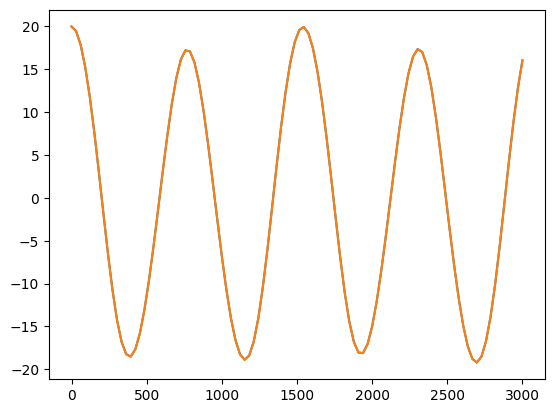

In [33]:
plt.plot(sol.ts,sol.ys[:,0])
plt.plot(pert_Gen.prog_base.ts,pert_Gen.prog_base.ys[0][:,0])

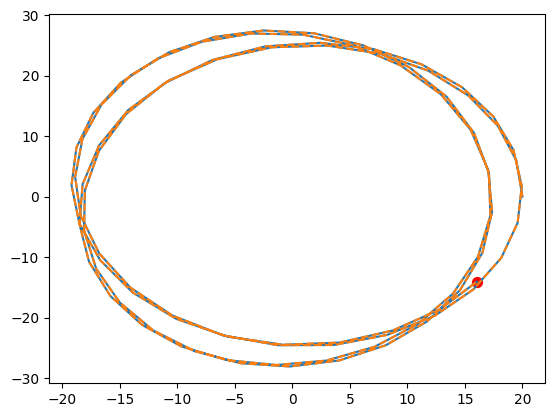

In [34]:
plt.plot(pert_Gen.prog_base.ys[0][:,0],pert_Gen.prog_base.ys[0][:,1])
plt.scatter(sol.ys[-1][0],sol.ys[-1][1],color='r',s=50)
#plt.plot(field_orb.ys[:,0], field_orb.ys[:,1])
plt.plot(sol.ys[:,0], sol.ys[:,1],ls='--')

In [35]:
pert_Gen.prog_fieldICs.shape

(100, 10, 12)

In [36]:
pert_Gen.gradientPotentialStructural_per_SH(jnp.array([1,2,.3]), 2300.0)

Array([[ 1.30433669e-18, -4.14385200e-19,  1.09038669e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],      dtype=float64)

In [56]:
fc = pert_Gen.base_stream.prog_loc_fwd[-1]#ts[-126]

In [45]:
lead_out_and_derivs, trail_out_and_derivs = pert_Gen.compute_perturbation_OTF(cpu=True, 
solver=diffrax.Dopri8(scan_kind='bounded'),rtol=1e-9,atol=1e-9,dtmin=0.01,dtmax=None)

In [49]:
lead_out_and_derivs[1]

Array([[[-7.48711090e-09, -8.47098884e-08,  6.10791049e-09, ...,
         -5.42439919e-09,  6.41530222e-09, -6.18487619e-09],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 2.25594632e-08,  1.27705321e-07,  1.50598954e-08, ...,
          1.03692670e-10, -8.21591682e-11,  1.22900576e-10],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [53]:
lead_out_and_derivs_, trail_out_and_derivs_ = pert_Gen.compute_perturbation_Interp(cpu=True, 
solver=diffrax.Dopri8(scan_kind='bounded'),rtol=1e-9,atol=1e-9,dtmin=0.01,dtmax=None)

In [54]:
#lead_out_and_derivs_v, trail_out_and_derivs_v = pert_Gen.compute_perturbation_OTF(cpu=False)

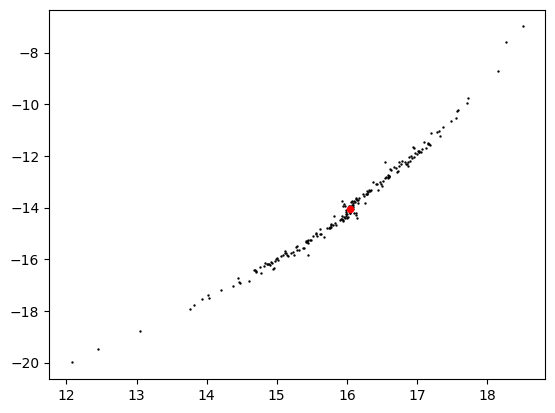

In [57]:
plt.scatter(lead_out_and_derivs[0][:,0], lead_out_and_derivs[0][:,1],s=0.5,color='k')
plt.scatter(trail_out_and_derivs[0][:,0], trail_out_and_derivs[0][:,1],s=0.5,color='k')
plt.scatter(fc[0],fc[1],color='r',s=20)

#plt.scatter(l[:,0], l[:,1],s=0.5,color='g')
#plt.scatter(t[:,0], t[:,1],s=0.5,color='g')
#plt.scatter(lead_out_and_derivs_v[0][:,0], lead_out_and_derivs_v[0][:,1],s=0.5,color='r')
#plt.scatter(trail_out_and_derivs_v[0][:,0], trail_out_and_derivs_v[0][:,1],s=0.5,color='r')

In [58]:
lead_out_and_derivs[1].shape

(99, 10, 12)

In [59]:
lead_out_and_derivs[0].shape

(99, 6)

(-21.0, -7.0)

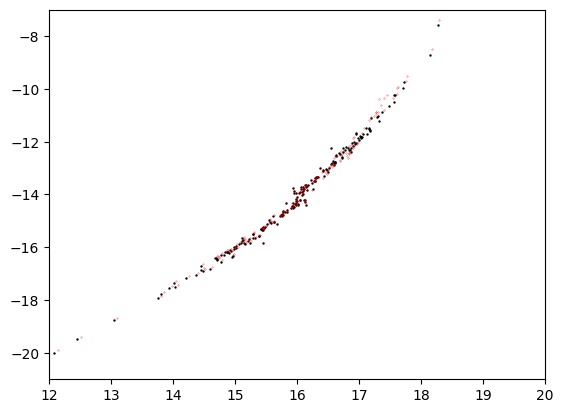

In [60]:

M_sh = 2e6
lead_lin = lead_out_and_derivs[0] + lead_out_and_derivs[1][:,0,:6]*M_sh
trail_lin = trail_out_and_derivs[0] + trail_out_and_derivs[1][:,0,:6]*M_sh
stream_lin = jnp.vstack([lead_lin,trail_lin])
#######

plt.scatter(lead_out_and_derivs[0][:,0], lead_out_and_derivs[0][:,1],s=0.5,color='k')
plt.scatter(trail_out_and_derivs[0][:,0], trail_out_and_derivs[0][:,1],s=0.5,color='k')

plt.scatter(stream_lin[:,0], stream_lin[:,1],s=0.05,color='r')
#plt.scatter(trail_out_and_derivs[0][:,0], trail_out_and_derivs[0][:,1],s=0.5,color='k')
plt.xlim(12,20)
plt.ylim(-21,-7)

(-21.0, -7.0)

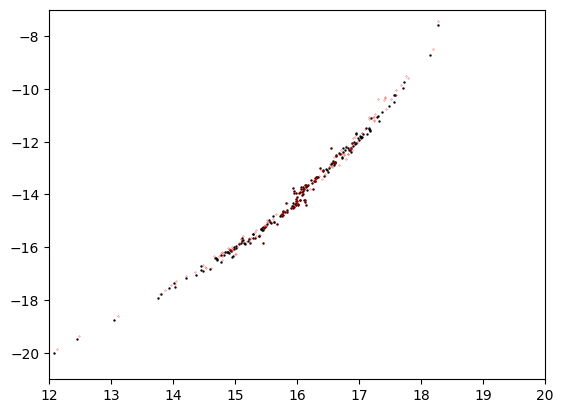

In [62]:

M_sh = 2e6
lead_lin = lead_out_and_derivs[0] + lead_out_and_derivs_[:,0,:6]*M_sh
trail_lin = trail_out_and_derivs[0] + trail_out_and_derivs_[:,0,:6]*M_sh
stream_lin = jnp.vstack([lead_lin,trail_lin])
#######

plt.scatter(lead_out_and_derivs[0][:,0], lead_out_and_derivs[0][:,1],s=0.5,color='k')
plt.scatter(trail_out_and_derivs[0][:,0], trail_out_and_derivs[0][:,1],s=0.5,color='k')

plt.scatter(stream_lin[:,0], stream_lin[:,1],s=0.05,color='r')
#plt.scatter(trail_out_and_derivs[0][:,0], trail_out_and_derivs[0][:,1],s=0.5,color='k')
plt.xlim(12,20)
plt.ylim(-21,-7)

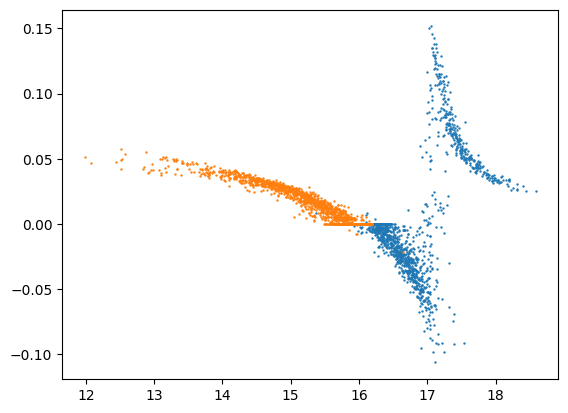

In [112]:
plt.scatter(lead_out_and_derivs[0][:,0],  lead_out_and_derivs[1][:,0,0]*M_sh,s=.5)
plt.scatter(trail_out_and_derivs[0][:,0],  trail_out_and_derivs[1][:,0,0]*M_sh,s=.5)

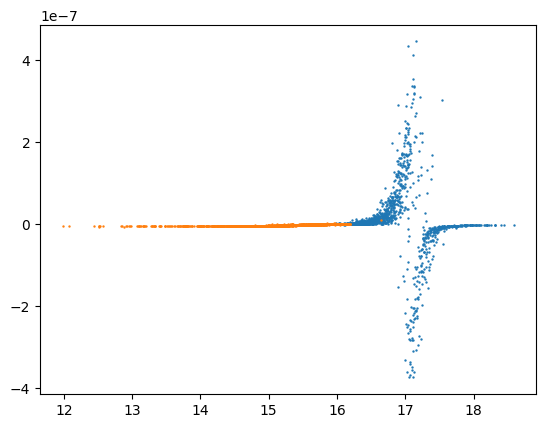

In [113]:
plt.scatter(lead_out_and_derivs[0][:,0],  lead_out_and_derivs[1][:,0,6]*1,s=.5)
plt.scatter(trail_out_and_derivs[0][:,0],  trail_out_and_derivs[1][:,0,6]*1,s=.5)

In [114]:
import warnings

# Ignore all warnings
#warnings.simplefilter('ignore')

# Ignore only DeprecationWarnings
#warnings.simplefilter('ignore', category=DeprecationWarning)

# Treat FutureWarnings as errors
#warnings.simplefilter('ignore', category=FutureWarning)

In [115]:
def gen_at_mass(mass):
    pot_SH_single = potential.SubhaloLinePotential(m=jnp.array([mass]), a=jnp.array([a[0]]), subhalo_x0=jnp.array([subhalo_x0[0,:]]),
    subhalo_v=jnp.array([subhalo_v[0,:]]), subhalo_t0=jnp.array([subhalo_t0[0]]), t_window=t_window[0],units=usys)

    prog_wf = pot_NFW.integrate_orbit(w0=w0, ts=jnp.array([ts[0],ts[-1]]), solver=diffrax.Dopri8(scan_kind='bounded')).ys[1]
    pot_lst = [pot_NFW, pot_SH_single]
    pot_total = potential.Potential_Combine(potential_list=pot_lst, units=usys)
    prog_init = pot_total.integrate_orbit(w0=prog_wf, t0=ts.max(),t1=ts.min(), ts=jnp.array([ts.min()])).ys[0]


    lead_nonlin, trail_nonlin = StreamSculptor.gen_stream_vmapped_with_pert(pot_base=pot_NFW,pot_pert=pot_SH_single, 
    ts=ts, prog_w0=prog_init, Msat=1e4, seed_num=493, solver=diffrax.Dopri8(scan_kind='bounded'), rtol=1e-9, atol=1e-9,dtmin=0.01, jump_ts=pert_Gen.jump_ts)
    return lead_nonlin, trail_nonlin

l_non, t_non = jax.jacfwd(gen_at_mass)(0.0)


In [116]:
lead_nonlin, trail_nonlin = gen_at_mass(2e6)
stream_nonlin = jnp.vstack([lead_nonlin,trail_nonlin])

In [117]:
lead_unpert, trail_unpert = gen_at_mass(0.0)

In [118]:

M_sh = 2e6
lead_lin_ = lead_out_and_derivs[0] + l_non*M_sh
trail_lin_ = trail_out_and_derivs[0] + t_non*M_sh
stream_lin_ = jnp.vstack([lead_lin_,trail_lin_])

(-21.0, -7.0)

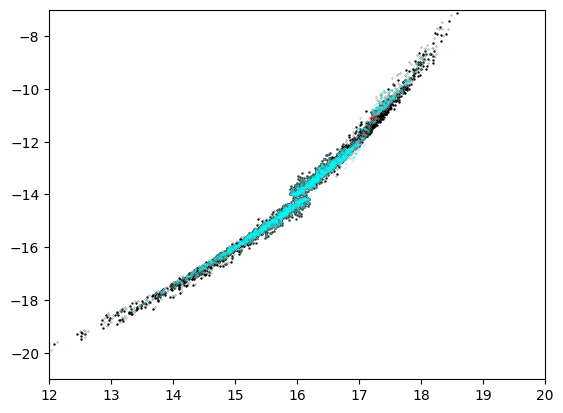

In [119]:

M_sh = 2e6
lead_lin = lead_out_and_derivs[0] + lead_out_and_derivs[1][:,0,:6]*M_sh
trail_lin = trail_out_and_derivs[0] + trail_out_and_derivs[1][:,0,:6]*M_sh
stream_lin = jnp.vstack([lead_lin,trail_lin])
#######

plt.scatter(lead_out_and_derivs[0][:,0], lead_out_and_derivs[0][:,1],s=0.5,color='k')
plt.scatter(trail_out_and_derivs[0][:,0], trail_out_and_derivs[0][:,1],s=0.5,color='k')

plt.scatter(stream_lin[:,0], stream_lin[:,1],s=0.05,color='r')
plt.scatter(stream_lin_[:,0], stream_lin_[:,1],s=0.05,color='cyan')

#plt.scatter(trail_out_and_derivs[0][:,0], trail_out_and_derivs[0][:,1],s=0.5,color='k')
plt.xlim(12,20)
plt.ylim(-21,-7)

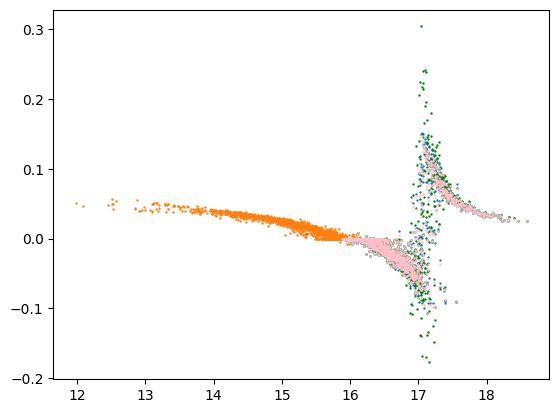

In [123]:
dim = 0
plt.scatter(lead_out_and_derivs[0][:,0],  lead_out_and_derivs[1][:,0,dim]*M_sh,s=.5)
plt.scatter(trail_out_and_derivs[0][:,0],  trail_out_and_derivs[1][:,0,dim]*M_sh,s=.5)


plt.scatter(lead_out_and_derivs[0][:,0],  l_non[:,dim]*M_sh,s=.5,color='g')

delta_nonlin = lead_nonlin - lead_unpert

plt.scatter(lead_out_and_derivs[0][:,0],  delta_nonlin[:,dim],s=.5,color='pink')


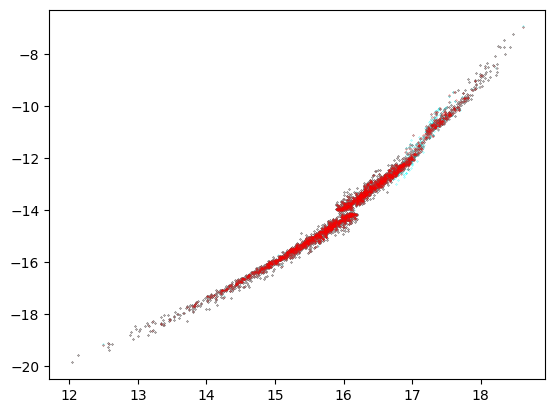

In [124]:
plt.scatter(stream_lin_[:,0], stream_lin_[:,1],s=0.05,color='cyan')
plt.scatter(stream_nonlin[:,0], stream_nonlin[:,1],s=0.05,color='teal')
plt.scatter(stream_lin[:,0], stream_lin[:,1],s=0.05,color='r')


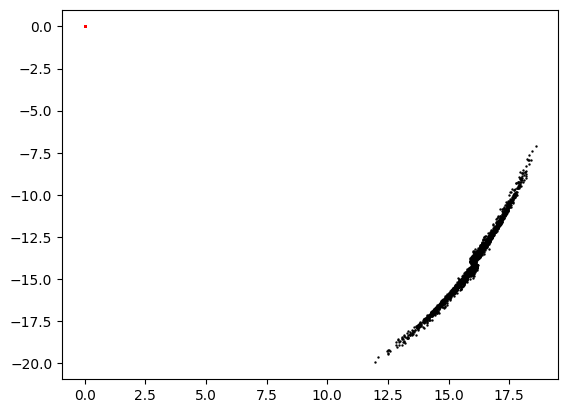

In [127]:

plt.scatter(lead_out_and_derivs[0][:,0], lead_out_and_derivs[0][:,1],s=0.5,color='k')
plt.scatter(trail_out_and_derivs[0][:,0], trail_out_and_derivs[0][:,1],s=0.5,color='k')
plt.scatter(l_non[:,0], l_non[:,1],s=0.5,color='r')
plt.scatter(t_non[:,0], t_non[:,1],s=0.5,color='r')

In [128]:
a[0]

Array(0.2, dtype=float64)

In [129]:
def gen_at_mass_radius(mass, radius):
    pot_SH_single = potential.SubhaloLinePotential(m=jnp.array([mass]), a=jnp.array([radius]), subhalo_x0=jnp.array([subhalo_x0[0,:]]),
    subhalo_v=jnp.array([subhalo_v[0,:]]), subhalo_t0=jnp.array([subhalo_t0[0]]), t_window=t_window[0],units=usys)
    prog_wf = pot_NFW.integrate_orbit(w0=w0, ts=jnp.array([ts[0],ts[-1]]), solver=diffrax.Dopri8(scan_kind='bounded')).ys[1]
    pot_lst = [pot_NFW, pot_SH_single]
    pot_total = potential.Potential_Combine(potential_list=pot_lst, units=usys)
    prog_init = pot_total.integrate_orbit(w0=prog_wf, t0=ts.max(),t1=ts.min(), ts=jnp.array([ts.min()])).ys[0]


    lead_nonlin, trail_nonlin = StreamSculptor.gen_stream_vmapped_with_pert(pot_base=pot_NFW,pot_pert=pot_SH_single, 
    ts=ts, prog_w0=prog_init, Msat=1e4, seed_num=493, solver=diffrax.Dopri8(scan_kind='bounded'), rtol=1e-9, atol=1e-9,dtmin=0.01, jump_ts=pert_Gen.jump_ts)
    return lead_nonlin, trail_nonlin
dlead_dmass, dtrail_dmass = jax.jacfwd(gen_at_mass_radius,argnums=(0,))(0.0,0.2)
d2lead, d2trail = jax.jacfwd(jax.jacfwd(gen_at_mass_radius,argnums=(0,)),argnums=(1,))(0.0,0.2)

dlead_dmass, dtrail_dmass = dlead_dmass[0], dtrail_dmass[0]
d2lead, d2trail = d2lead[0][0], d2trail[0][0]


(-1e-06, 1e-06)

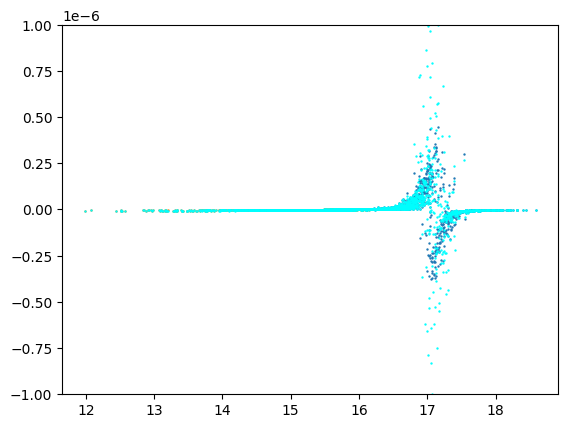

In [138]:
dd=0
plt.scatter(lead_out_and_derivs[0][:,0],  lead_out_and_derivs[1][:,0,6+dd]*1,s=.5)
plt.scatter(trail_out_and_derivs[0][:,0],  trail_out_and_derivs[1][:,0,6+dd]*1,s=.5)


plt.scatter(lead_out_and_derivs[0][:,0],  d2lead[:,dd]*1,s=.5,color='cyan')
plt.scatter(trail_out_and_derivs[0][:,0],  d2trail[:,dd]*1,s=.5,color='cyan')
plt.ylim(-1e-6,1e-6)


In [138]:
prog_init = pot_total.integrate_orbit(w0=prog_wf, t0=ts.max(),t1=ts.min(), ts=jnp.array([ts.min()])).ys[0]


In [139]:
prog_init

Array([ 1.99980532e+01, -2.56099519e-01,  1.99843423e+01,  1.41873880e-03,
        1.99946222e-01,  1.36733644e-03], dtype=float64)

In [28]:
stream_lin.shape

(2998, 6)

In [31]:
lead_out_and_derivs[1]/lead_out_and_derivs_v[1]




Array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [28]:
output[0].ys[0].shape#.ys[1].shape

(1499, 2, 6)

In [35]:
output[0].ys[1].shape

(1499, 2, 10, 12)

In [20]:
pert_Gen.compute_perturbation_ICs()[1].shape

(1500, 10, 12)

In [38]:
pert_Gen.perturbation_ICs[1].shape

(1500, 10, 12)

In [31]:
base_model.streamICs[3].shape

(1500, 3)

In [33]:
 jnp.hstack([base_model.streamICs[0], base_model.streamICs[2]]).shape

(1500, 6)

In [22]:
lout, tout = pert_Gen.compute_base_stream(cpu=False)


In [29]:
base_model.dRel_dIC.shape

(1500, 2, 6, 6)

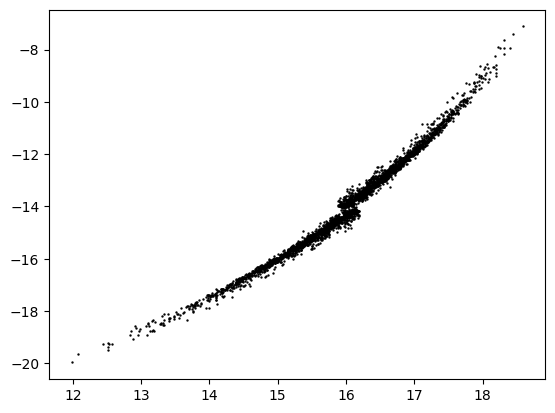

In [23]:
plt.scatter(lout[:,0], lout[:,1],s=0.5,color='k')
plt.scatter(tout[:,0], tout[:,1],s=0.5,color='k')


In [19]:
pert_Gen.fieldICs.ys[1]

(1500, 10, 12)

In [20]:
ts.shape

(1500,)

In [30]:
jnp.sum(pert_Gen.fieldICs.ys[1],axis=1)[2]

Array([-1.35768480e-13,  4.49920989e-15, -1.35768149e-13, -3.87432793e-14,
        1.29758755e-15, -3.87550906e-14,  5.01245915e-16, -1.72591489e-17,
        4.99398722e-16,  1.42980983e-16, -4.97669531e-18,  1.42482560e-16],      dtype=float64)

In [31]:
pert_Gen.jump_ts

Array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float64)

In [ ]:
pot_SH.subhalo_x0.shape

(10, 3)

In [ ]:
pert_Gen.prog_w0

AttributeError: 'GenerateMassRadiusPerturbation' object has no attribute 'prog_w0'

In [ ]:
pert_field = fields.MassRadiusPerturbation_OTF(pert_Gen)



In [ ]:
example_coords = [jnp.hstack([jnp.ones(3),jnp.ones(3)]), 
                jnp.hstack([jnp.ones((10,3)),jnp.ones((10,3)), jnp.ones((10,3)), jnp.ones((10,3))])]
#example_coords[1].shape
pert_field.term(0.0,example_coords, None)

[Array([ 1.        ,  1.        ,  1.        , -0.00290453, -0.00290453,
        -0.00290453], dtype=float64),
 Array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.09774548e-04,
         3.09774549e-04, 3.09774548e-04, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 3.09774549e-04, 3.09774549e-04, 3.09774549e-04],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.09774548e-04,
         3.09774548e-04, 3.09774549e-04, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 3.09774549e-04, 3.09774549e-04, 3.09774549e-04],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.09774548e-04,
         3.09774548e-04, 3.09774548e-04, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 3.09774549e-04, 3.09774549e-04, 3.09774549e-04],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.09774549e-04,
         3.09774548e-04, 3.09774548e-04, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 3.09774549e-04, 3.09774549e-04, 3.09774549e-04],
        [

In [ ]:
jnp.ones((10,3))

Array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float64)

In [ ]:
pert_Gen.gradientPotentialPerturbation_per_SH(jnp.array([1.,20.,3.]),0.0).shape

(10, 3)

In [ ]:
obj = BaseStreamModel(potential_base=pot_NFW,prog_w0=w0, ts=ts, Msat=1e4,seednum=493, solver=diffrax.Dopri5(scan_kind='bounded') )

In [ ]:
obj.prog_loc_fwd.shape

(1500, 6)

In [ ]:
obj.dRel_dIC

Array([[[[ 9.96418614e-01,  4.87120170e-04, -4.42824880e-05,
          -9.30743752e-02,  1.31131449e-01, -2.19712970e-02],
         [ 1.03703439e-03,  9.96216989e-01,  1.02067057e-04,
           4.18392106e-02,  8.93746158e-02, -1.20250323e-01],
         [ 1.34265400e-03,  8.89893678e-04,  9.96105638e-01,
          -6.74033188e-02,  7.26106414e-02,  3.69975941e-03],
         [ 6.32656012e-06, -4.10394642e-07, -7.62879260e-07,
           1.00013673e+00, -4.93138630e-04,  2.95917439e-04],
         [ 3.56197289e-06, -1.90869969e-06, -3.86061491e-06,
           5.61375084e-04,  1.00018700e+00, -7.25433287e-04],
         [ 2.54819675e-06, -2.46533325e-06, -3.85776049e-06,
          -6.29240028e-04,  3.29080427e-04,  1.00034053e+00]],

        [[ 1.00358139e+00, -4.87120170e-04,  4.42824880e-05,
           9.30743752e-02, -1.31131449e-01,  2.19712970e-02],
         [-1.03703439e-03,  1.00378301e+00, -1.02067057e-04,
          -4.18392106e-02, -8.93746158e-02,  1.20250323e-01],
         [-1.3

In [ ]:
deriv = obj.release_func_jacobian()

In [ ]:
deriv.shape

(1500, 2, 6, 6)

In [ ]:
from genstream import StreamModel
